In [2]:
from HeaderP import *
import Astraea

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

Read in kepler and train model

Kepler Prot

In [38]:
Prots=pd.read_pickle('Data/Mc_Gar_Sant')
print(np.shape(Prots))

(38573, 169)


In [157]:
mcq_T1=pd.read_table('https://arxiv.org/src/1402.5694v2/anc/Table_1_Periodic.txt',delimiter=',')
mcq_T2=pd.read_table('https://arxiv.org/src/1402.5694v2/anc/Table_2_Non_Periodic.txt',delimiter=',')
frames = [mcq_T1, mcq_T2]
kepler=result = pd.concat(frames)
kepler=kepler.dropna(subset=['Prot'])
kepler=kepler.loc[kepler['w']>0.15].reset_index(drop=True)
gaia=pd.read_pickle('Data/gaia.pkl')
kepler=pd.merge(kepler,gaia,left_on='KID',right_on='kepid',how='inner')
kepler=kepler.drop_duplicates(keep='first')
print(np.shape(kepler))

(43809, 145)


In [158]:
frames = [Prots.loc[~Prots['KID'].isin(kepler['KID'])], kepler]
kepler=result = pd.concat(frames)
kepler=kepler.dropna(subset=['Prot']).drop_duplicates(keep='first')
print(np.shape(kepler))


(47041, 169)


GALAH data

In [149]:
galah=pd.read_pickle('Data/gala_gaia_cm.pkl')
print(np.shape(galah))

(577362, 264)


In [160]:
galah['bp_rp']=galah['bp_rp_x']
galah['parallax']=galah['parallax_x']
galah['parallax_error']=galah['parallax_error_x']
galah['phot_g_mean_mag']=galah['phot_g_mean_mag_x']
galah['ruwe']=galah['ruwe_x']
galah['pmra']=galah['pmra_x']
galah['pmdec']=galah['pmdec_x']


In [152]:
list(galah.columns)

['star_id',
 'sobject_id',
 'source_id_x',
 'survey_name',
 'field_id',
 'flag_repeat',
 'wg4_field',
 'wg4_pipeline',
 'flag_sp',
 'teff',
 'e_teff',
 'irfm_teff',
 'irfm_ebv',
 'irfm_ebv_ref',
 'logg',
 'e_logg',
 'fe_h',
 'e_fe_h',
 'flag_fe_h',
 'fe_h_atmo',
 'vmic',
 'vbroad',
 'e_vbroad',
 'chi2_sp',
 'alpha_fe',
 'e_alpha_fe',
 'nr_alpha_fe',
 'flag_alpha_fe',
 'flux_A_Fe',
 'chi_A_Fe',
 'Li_fe',
 'e_Li_fe',
 'nr_Li_fe',
 'flag_Li_fe',
 'C_fe',
 'e_C_fe',
 'nr_C_fe',
 'flag_C_fe',
 'O_fe',
 'e_O_fe',
 'nr_O_fe',
 'flag_O_fe',
 'Na_fe',
 'e_Na_fe',
 'nr_Na_fe',
 'flag_Na_fe',
 'Mg_fe',
 'e_Mg_fe',
 'nr_Mg_fe',
 'flag_Mg_fe',
 'Al_fe',
 'e_Al_fe',
 'nr_Al_fe',
 'flag_Al_fe',
 'Si_fe',
 'e_Si_fe',
 'nr_Si_fe',
 'flag_Si_fe',
 'K_fe',
 'e_K_fe',
 'nr_K_fe',
 'flag_K_fe',
 'Ca_fe',
 'e_Ca_fe',
 'nr_Ca_fe',
 'flag_Ca_fe',
 'Sc_fe',
 'e_Sc_fe',
 'nr_Sc_fe',
 'flag_Sc_fe',
 'Ti_fe',
 'e_Ti_fe',
 'nr_Ti_fe',
 'flag_Ti_fe',
 'Ti2_fe',
 'e_Ti2_fe',
 'nr_Ti2_fe',
 'flag_Ti2_fe',
 'V_fe',
 '

## Train Astraea with Kepler and gaia

In [161]:
"""
features=['radius_val','pmra','pmra_error','pmdec','pmdec_error','parallax','parallax_error',
          'bp_g','bp_rp','ra','ra_error','dec','dec_error','lum_val',
          'teff','teff_err1','teff_err2','phot_g_mean_mag','phot_g_mean_flux_error']
"""
features=['phot_g_mean_flux_error','bp_rp','parallax','parallax_error','phot_g_mean_mag','pmra',
         'pmdec']

kepler=kepler[np.append(features,['Prot'])].dropna()
print(np.shape(kepler))

(45132, 8)


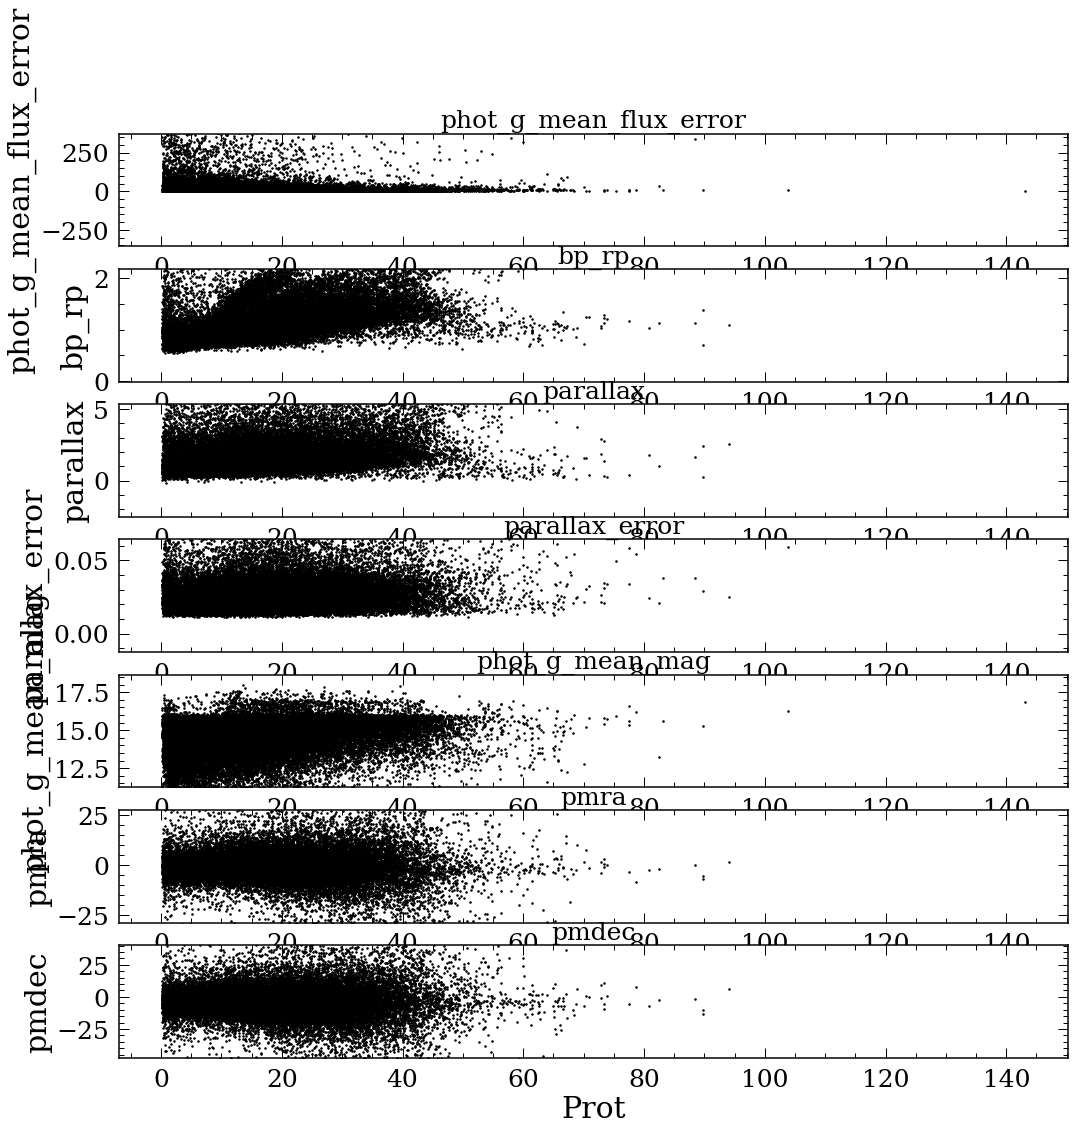

In [162]:
Astraea.plot_corr(Prots,features,MS=3)


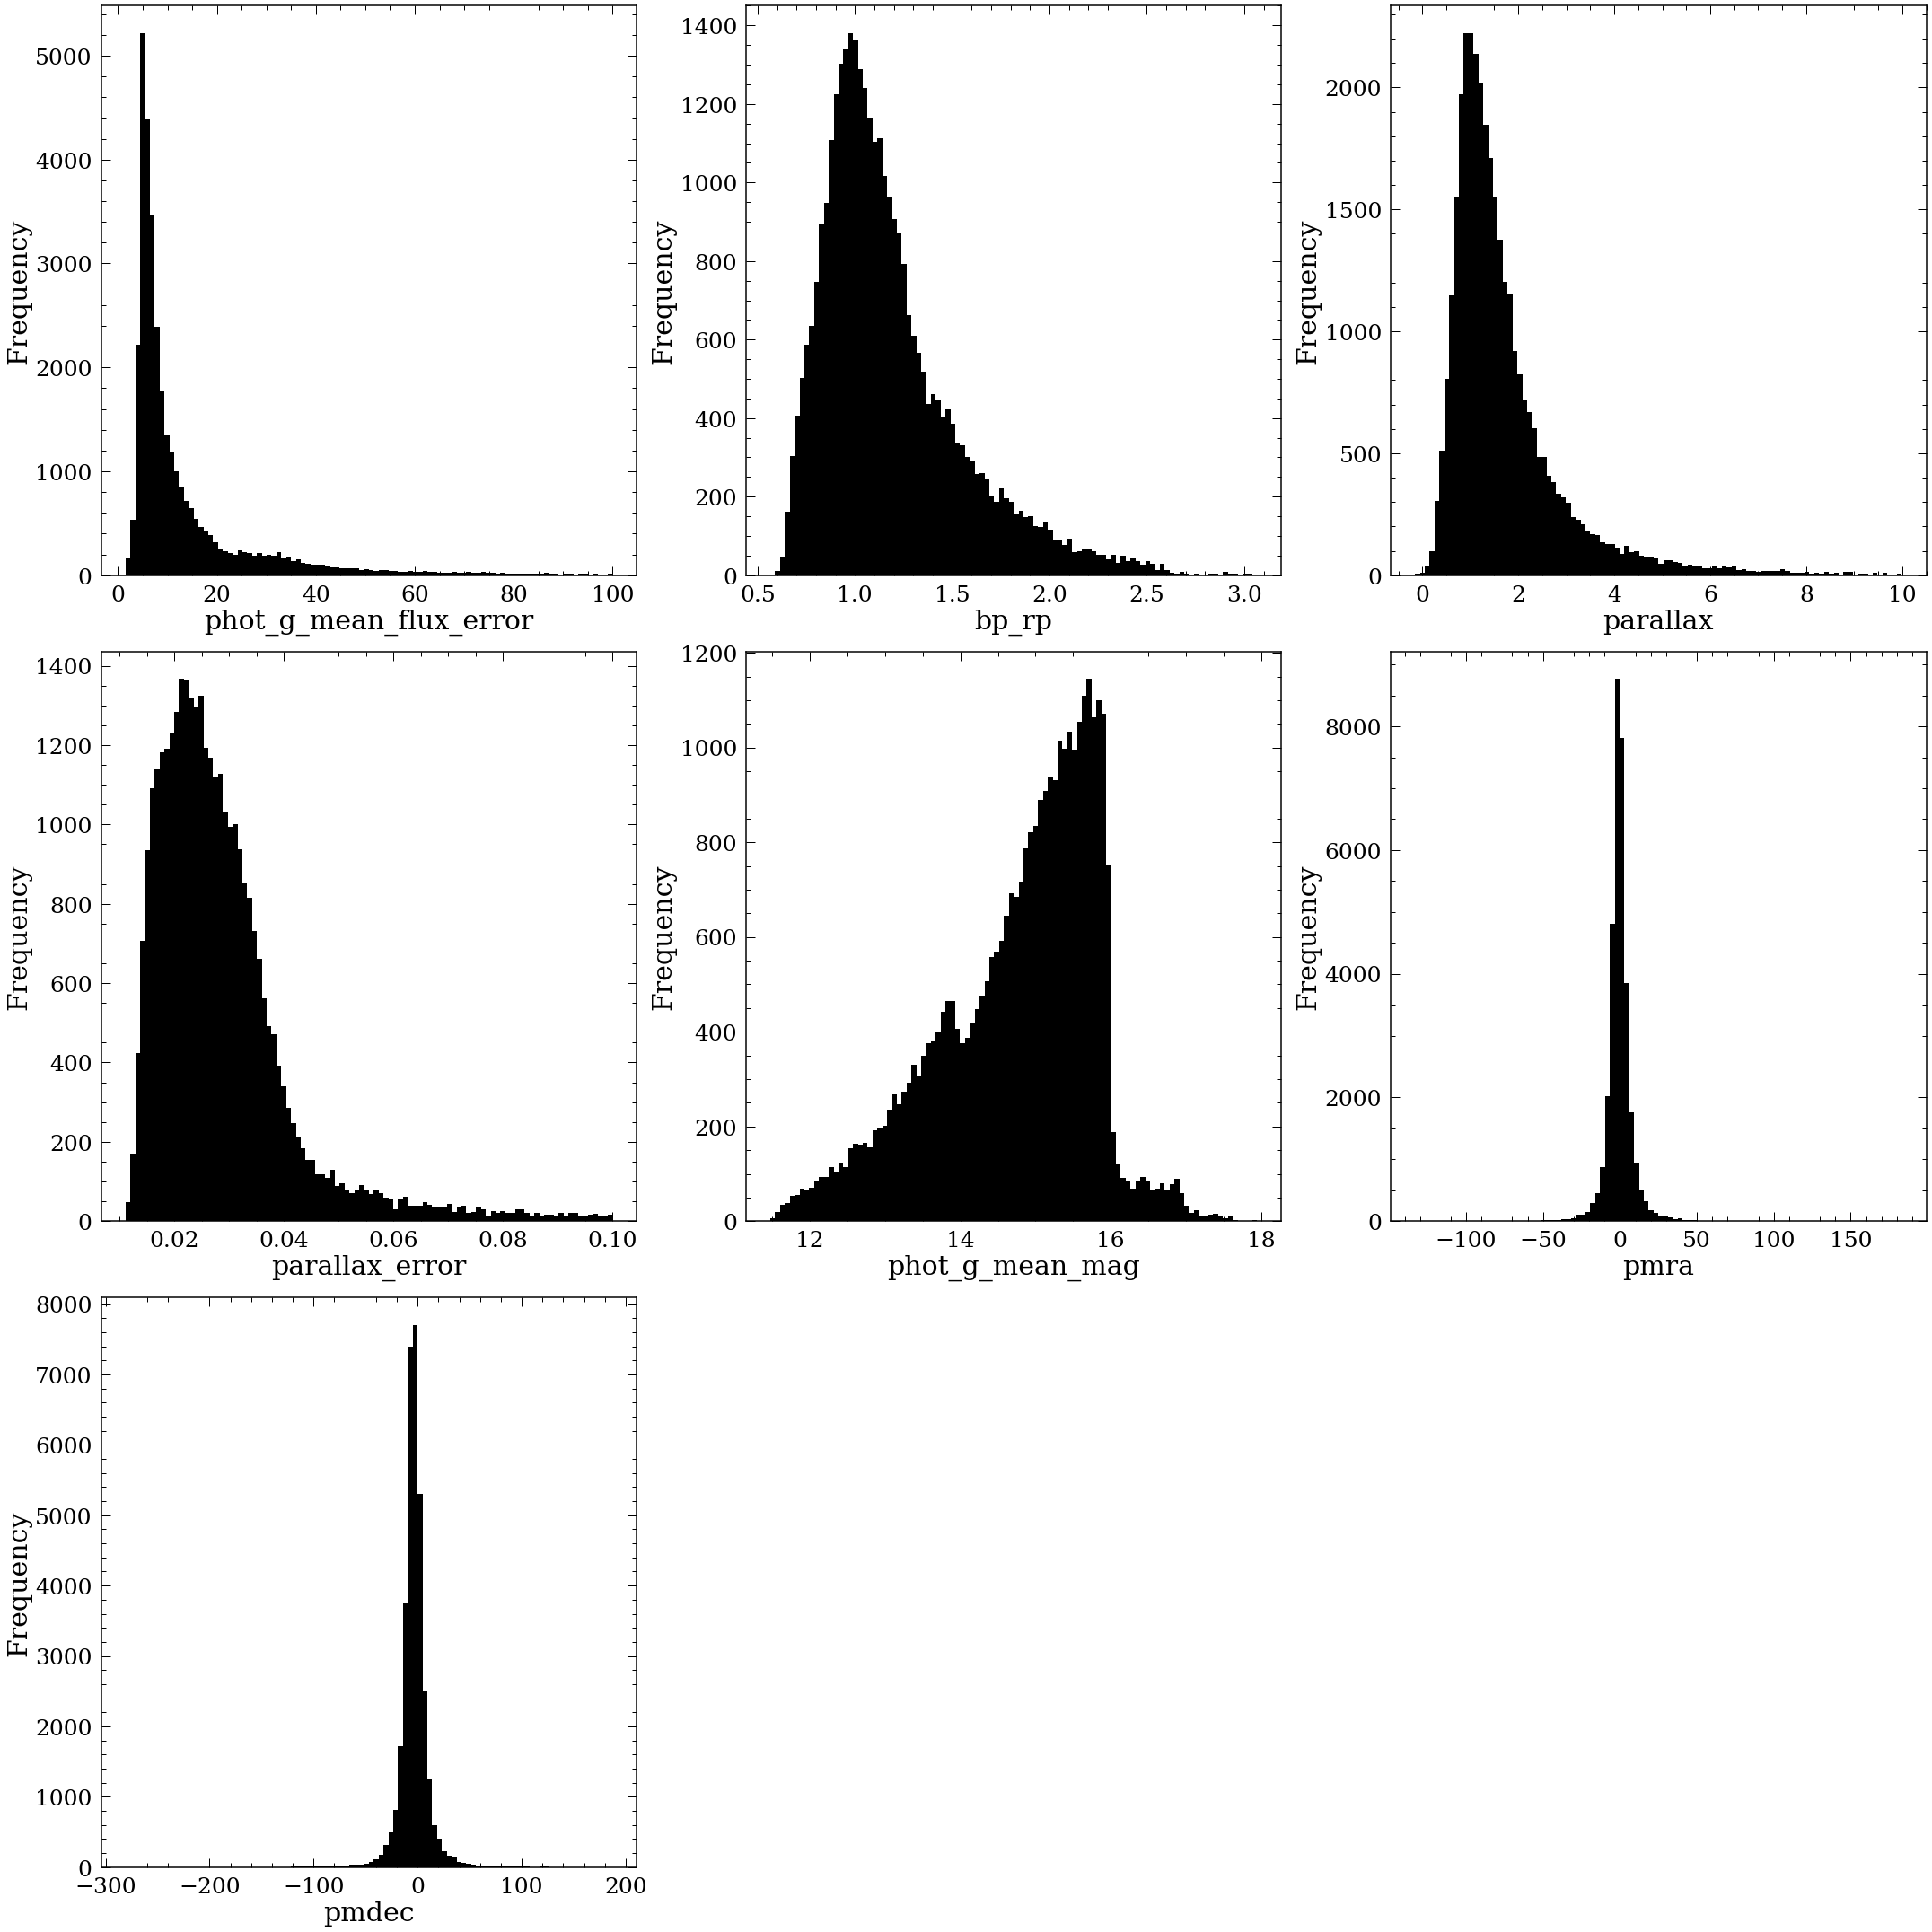

In [177]:
Prots=Prots.loc[Prots['parallax']<10].reset_index(drop=True)
Prots=Prots.loc[Prots['parallax_error']<0.1].reset_index(drop=True)

Prots=Prots.loc[Prots['phot_g_mean_flux_error']<100].reset_index(drop=True)

titles=features
plt.figure(figsize=(30,30))
for i in range(1,len(features)+1):
    plt.subplot(3,3,i)
    plt.hist(Prots[features[i-1]],color='k',bins=100)
    plt.xlabel(features[i-1])
    plt.ylabel('Frequency')
plt.tight_layout()


In [171]:
regr, regr_outs = Astraea.RFregressor(Prots, features,
                                      target_var='Prot', target_var_err='Prot_err', n_estimators=100)

Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 7
Features attempt to train: ['phot_g_mean_flux_error', 'bp_rp', 'parallax', 'parallax_error', 'phot_g_mean_mag', 'pmra', 'pmdec']
33773 stars in dataframe!
Missing 39 stars from null values in data!

33734 total stars used for RF!
26987 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.23921408245311948
Average chi^2 is: 2045.4534384345814
Finished!


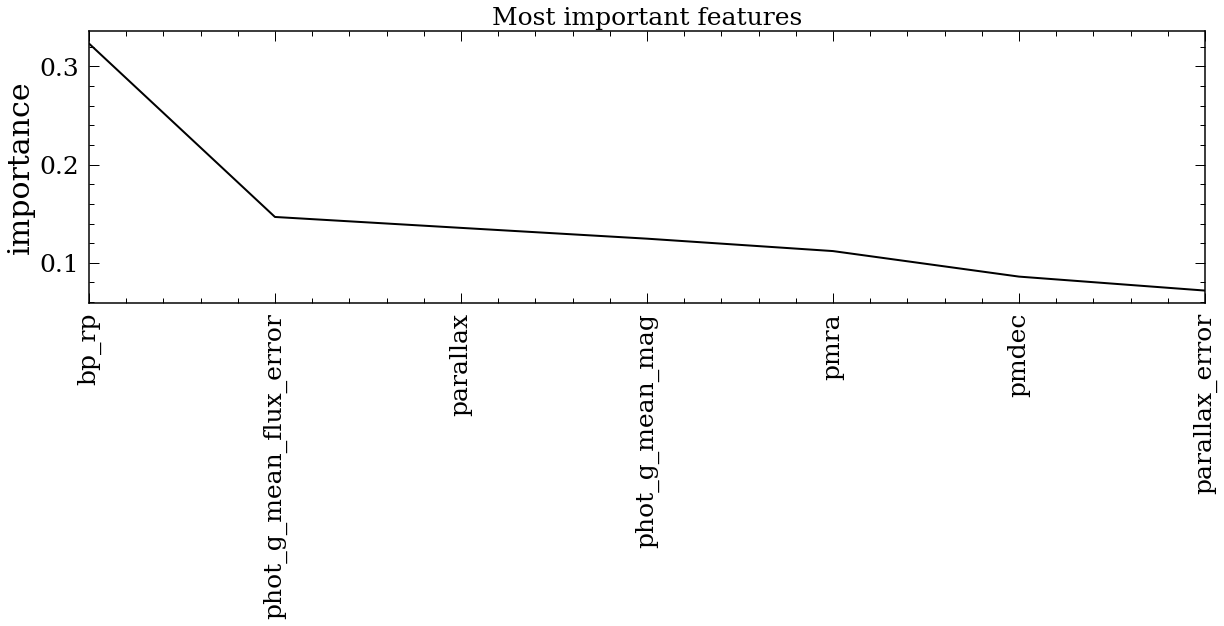

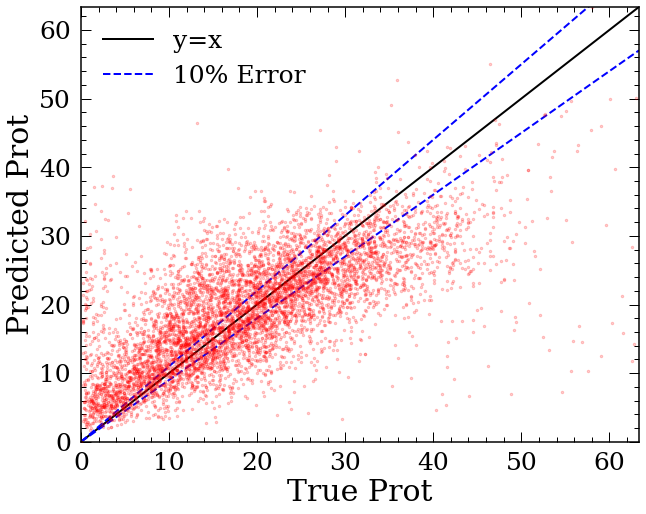

In [172]:
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='Prot', MS=5)

In [173]:
gaia_feat=gaia[regr_outs['actrualF']].dropna().reset_index(drop=True)
print(np.shape(gaia_feat))

(194932, 7)


In [174]:
#gaia_feat["abs_G"] = m_to_M(gaia_feat.phot_g_mean_mag.values, 1./gaia_feat.parallax.values)

In [175]:
#gaia_feat=gaia_feat.loc[gaia_feat['abs_G']>4]

(166640, 7)


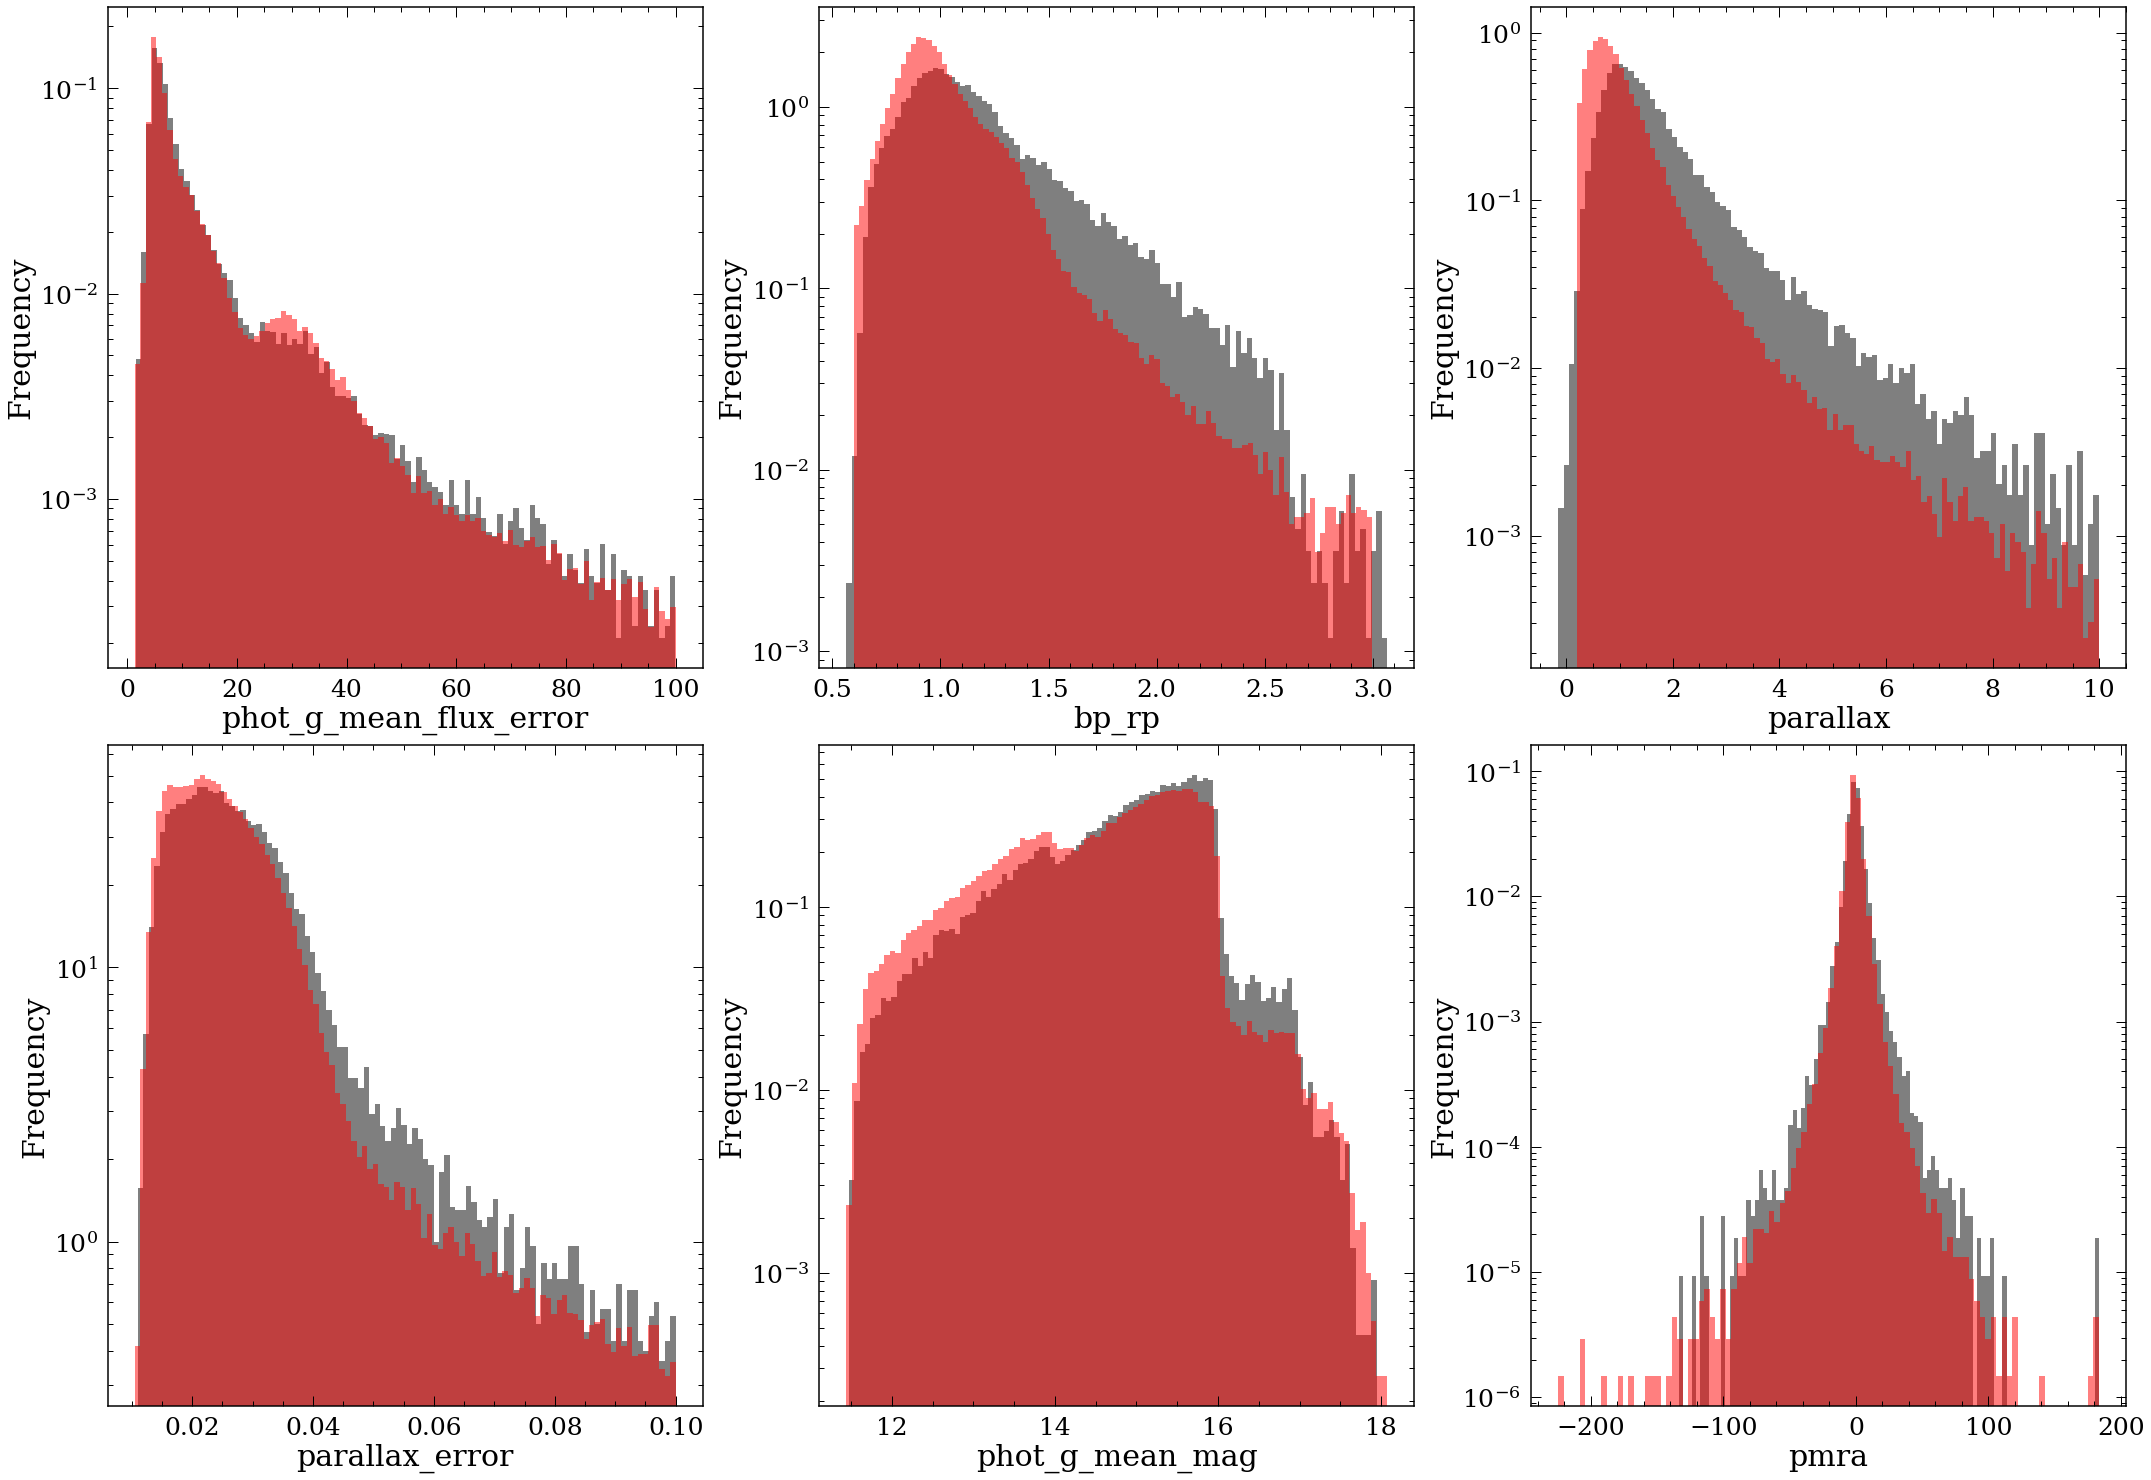

In [180]:
gaia_feat=gaia_feat.loc[gaia_feat['parallax']<10].reset_index(drop=True)
gaia_feat=gaia_feat.loc[gaia_feat['parallax']>0.2].reset_index(drop=True)
gaia_feat=gaia_feat.loc[gaia_feat['parallax_error']<0.1].reset_index(drop=True)

gaia_feat=gaia_feat.loc[gaia_feat['phot_g_mean_mag']>8].reset_index(drop=True)
gaia_feat=gaia_feat.loc[gaia_feat['phot_g_mean_mag']<19].reset_index(drop=True)

gaia_feat=gaia_feat.loc[gaia_feat['bp_rp']>0.6].reset_index(drop=True)
gaia_feat=gaia_feat.loc[gaia_feat['bp_rp']<3].reset_index(drop=True)

gaia_feat=gaia_feat.loc[gaia_feat['phot_g_mean_flux_error']<100].reset_index(drop=True)


titles=features
plt.figure(figsize=(30,30))
for i in range(1,len(features)):
    plt.subplot(3,3,i)
    plt.hist(Prots[features[i-1]],color='k',bins=100,alpha=0.5,density=True)
    plt.hist(gaia_feat[features[i-1]],color='r',bins=100,alpha=0.5,density=True)
    plt.yscale('log')
    plt.xlabel(features[i-1])
    plt.ylabel('Frequency')
plt.tight_layout()

print(np.shape(gaia_feat))

In [181]:
gaia_feat['Prot_predict']=regr.predict(gaia_feat[regr_outs['actrualF']])

(0, 50)

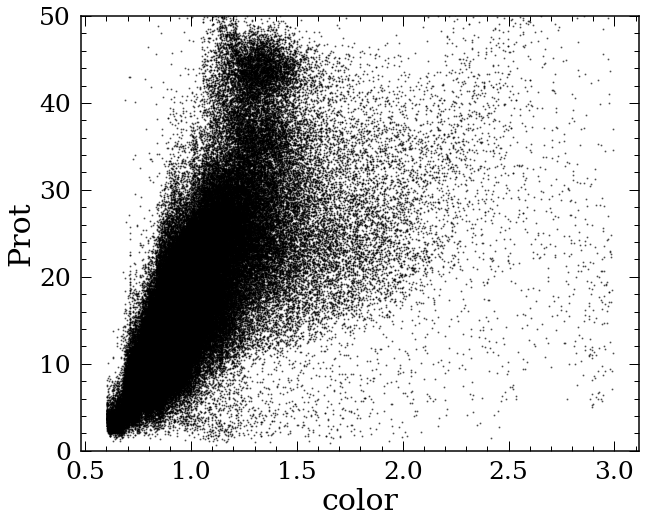

In [182]:
plt.figure(figsize=(10,8))
plt.scatter(gaia_feat['bp_rp'],gaia_feat['Prot_predict'],s=1,alpha=0.5,c='k')
plt.xlabel('color')
plt.ylabel('Prot')
#plt.xlim([3000,7000])
plt.ylim([0,50])
#plt.gca().invert_xaxis()


# Get gaia data for GALAH

In [4]:
galah=readfits('Data/GALAH_DR3_main_allstar_v1.fits')
print(np.shape(galah))

(588571, 207)


In [90]:
galah['Ra']=galah['ra']
galah['Dec']=galah['dec']

In [148]:
galah[['star_id','ra','dec']].to_csv('galahcm')

In [7]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia


In [145]:
Gaia.login()

User: ylu
········
OK


In [142]:
from astropy.table import Table
starid=galah['star_id'].values
ra=galah['ra'].values
dec=galah['dec'].values

galah_astropy = Table([starid,ra,dec], names=['starid','ra','dec'], meta={'meta':'first table'})


In [146]:
table = galah_astropy

In [ ]:
Gaia.upload_table(upload_resource=table, table_name='my_sources')

In [109]:
Gaia.login_gui()

OK


In [ ]:
tables = Gaia.load_tables(only_names=True, include_shared_tables=True)

In [ ]:
Gaia.update_user_table(table_name="user_ylu.my_sources",
                       list_of_changes=[["ra","flags","Ra"],
                                        ["dec","flags","Dec"]])

In [99]:
table = Gaia.load_table('gaiadr2.gaia_source')

Retrieving table 'gaiadr2.gaia_source'
Parsing table 'gaiadr2.gaia_source'...
Done.


In [129]:
full_qualified_table_name = 'user_ylu.my_sources'

In [130]:
xmatch_table_name = 'xmatch_table_1'

In [ ]:
Gaia.cross_match(full_qualified_table_name_a=full_qualified_table_name,
                 full_qualified_table_name_b='gaiadr2.gaia_source',
                 results_table_name=xmatch_table_name, radius=1.0)

In [ ]:
xmatch_table = 'user_ylu.' + xmatch_table_name

In [ ]:
query = ('SELECT c."dist"*3600 as dist, a.*, b.* FROM gaiadr2.gaia_source AS a, '
         'full_qualified_table_name+' AS b, '
         'xmatch_table+' AS c '
         'WHERE (c.gaia_source_source_id = a.source_id AND '
         'c.my_sources_my_sources_oid = b.my_sources_oid)')

In [ ]:
job = Gaia.launch_job(query=query)

In [ ]:
results = job.get_results()

In [ ]:
print(f"results = {results}")

In [10]:
ras=galah['ra'].values
decs=galah['dec'].values

In [310]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

coord = SkyCoord(ra=ras[0], dec=decs[0], unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(1, u.arcsec)
height = u.Quantity(1, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height).to_pandas()


INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
for i in trange(1,len(ras)):
    coord = SkyCoord(ra=ras[i], dec=decs[i], unit=(u.degree, u.degree), frame='icrs')
    width = u.Quantity(1, u.arcsec)
    height = u.Quantity(1, u.deg)
    Gaia.ROW_LIMIT = 1
    new=Gaia.query_object_async(coordinate=coord, width=width, height=height).to_pandas()
    print(len(new))
    r = pd.concat([r, new])
    print(len(r))
    clear_output(wait = True)



# Get gaia data for GALAH with gaiatool

In [1]:
import numpy as np
import sys; sys.path.insert(0, '../')
from gaia_tools.query import make_query, make_simple_query
import warnings; warnings.filterwarnings('ignore')

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [ ]:
circle = """
--Selections: Cluster RA
1=CONTAINS(POINT('ICRS',gaia.ra,gaia.dec),
           CIRCLE('ICRS',{ra:.4f},{dec:.4f},{rad:.2f}))
""".format(ra=230, dec=0, rad=4)

# Use it on GALAH

In [141]:
galah=readfits('Data/GALAH_DR3_main_allstar_v1.fits')
print(np.shape(galah))

(588571, 207)


In [317]:
list(galah.columns)

['star_id',
 'sobject_id',
 'source_id',
 'survey_name',
 'field_id',
 'flag_repeat',
 'wg4_field',
 'wg4_pipeline',
 'flag_sp',
 'teff',
 'e_teff',
 'irfm_teff',
 'irfm_ebv',
 'irfm_ebv_ref',
 'logg',
 'e_logg',
 'fe_h',
 'e_fe_h',
 'flag_fe_h',
 'fe_h_atmo',
 'vmic',
 'vbroad',
 'e_vbroad',
 'chi2_sp',
 'alpha_fe',
 'e_alpha_fe',
 'nr_alpha_fe',
 'flag_alpha_fe',
 'flux_A_Fe',
 'chi_A_Fe',
 'Li_fe',
 'e_Li_fe',
 'nr_Li_fe',
 'flag_Li_fe',
 'C_fe',
 'e_C_fe',
 'nr_C_fe',
 'flag_C_fe',
 'O_fe',
 'e_O_fe',
 'nr_O_fe',
 'flag_O_fe',
 'Na_fe',
 'e_Na_fe',
 'nr_Na_fe',
 'flag_Na_fe',
 'Mg_fe',
 'e_Mg_fe',
 'nr_Mg_fe',
 'flag_Mg_fe',
 'Al_fe',
 'e_Al_fe',
 'nr_Al_fe',
 'flag_Al_fe',
 'Si_fe',
 'e_Si_fe',
 'nr_Si_fe',
 'flag_Si_fe',
 'K_fe',
 'e_K_fe',
 'nr_K_fe',
 'flag_K_fe',
 'Ca_fe',
 'e_Ca_fe',
 'nr_Ca_fe',
 'flag_Ca_fe',
 'Sc_fe',
 'e_Sc_fe',
 'nr_Sc_fe',
 'flag_Sc_fe',
 'Ti_fe',
 'e_Ti_fe',
 'nr_Ti_fe',
 'flag_Ti_fe',
 'Ti2_fe',
 'e_Ti2_fe',
 'nr_Ti2_fe',
 'flag_Ti2_fe',
 'V_fe',
 'e_

get gaia data for galah

In [183]:
galah_feat=galah.dropna(subset=regr_outs['actrualF']).reset_index(drop=True)
print(np.shape(galah_feat))

(576652, 271)


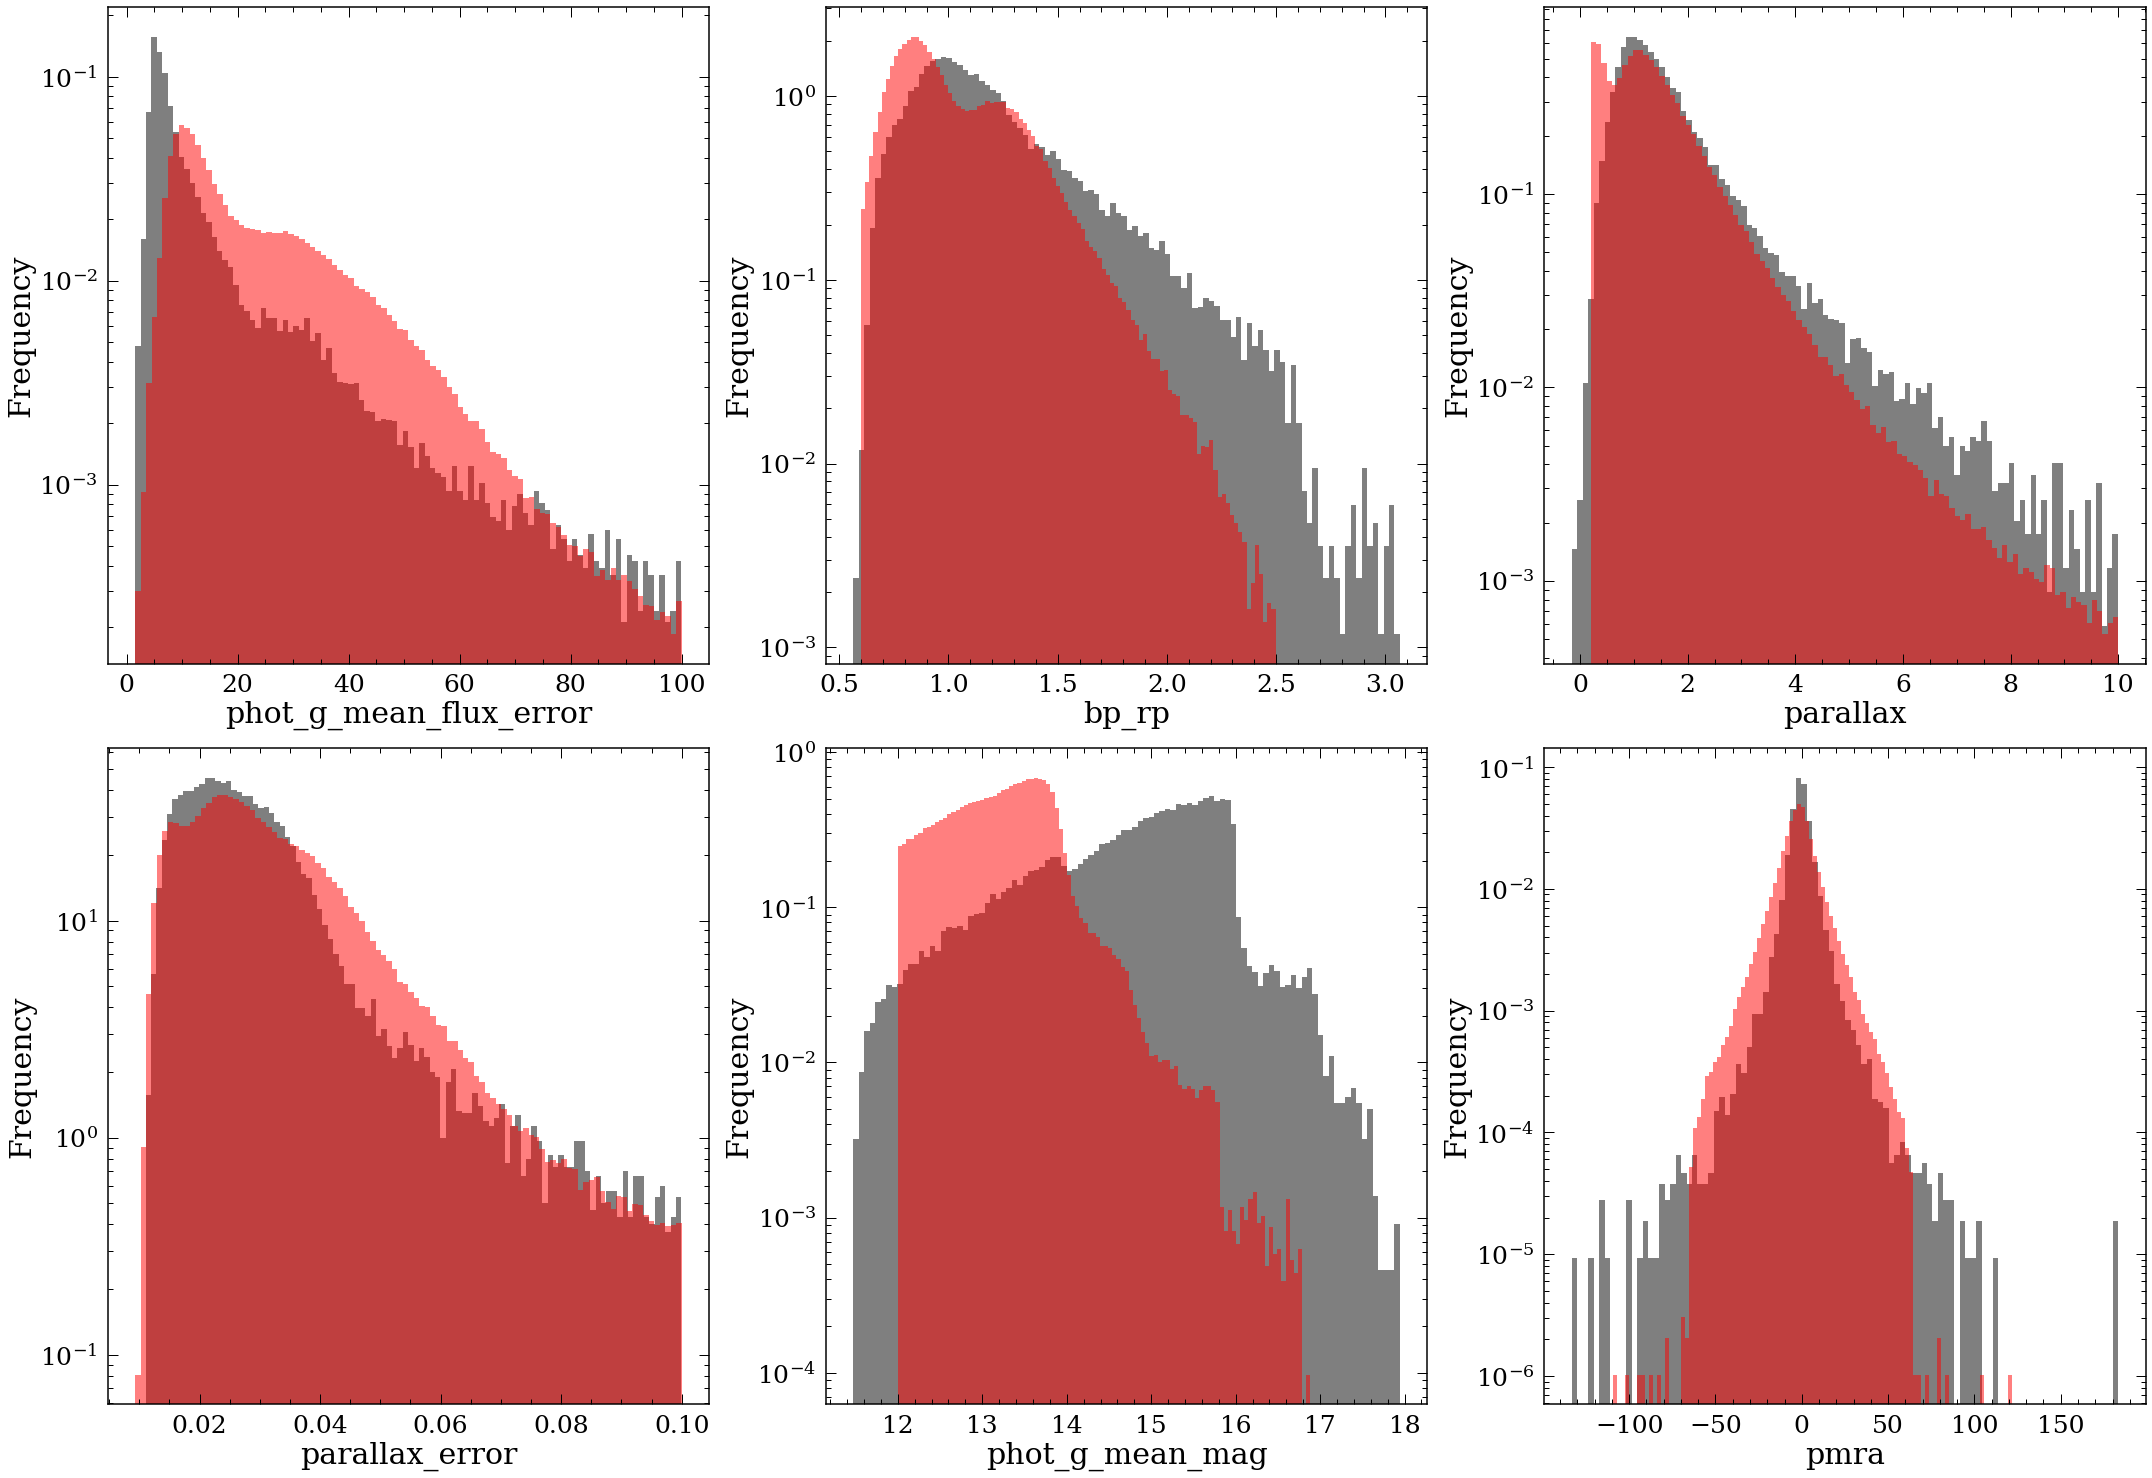

In [184]:
galah_feat=galah_feat.loc[galah_feat['parallax']<10].reset_index(drop=True)
galah_feat=galah_feat.loc[galah_feat['parallax']>0.2].reset_index(drop=True)

galah_feat=galah_feat.loc[galah_feat['parallax_error']<0.1].reset_index(drop=True)

galah_feat=galah_feat.loc[galah_feat['phot_g_mean_mag']>12].reset_index(drop=True)
galah_feat=galah_feat.loc[galah_feat['phot_g_mean_mag']<17].reset_index(drop=True)

galah_feat=galah_feat.loc[galah_feat['bp_rp']>0.6].reset_index(drop=True)
galah_feat=galah_feat.loc[galah_feat['bp_rp']<2.5].reset_index(drop=True)

galah_feat=galah_feat.loc[galah_feat['phot_g_mean_flux_error']<100].reset_index(drop=True)

titles=features
plt.figure(figsize=(30,30))
for i in range(1,len(features)):
    plt.subplot(3,3,i)
    plt.hist(Prots[features[i-1]],color='k',bins=100,alpha=0.5,density=True)
    plt.hist(galah_feat[features[i-1]],color='r',bins=100,alpha=0.5,density=True)
    plt.yscale('log')
    plt.xlabel(features[i-1])
    plt.ylabel('Frequency')
plt.tight_layout()

In [185]:
galah_feat['Prot_predict']=regr.predict(galah_feat[regr_outs['actrualF']])


(0, 50)

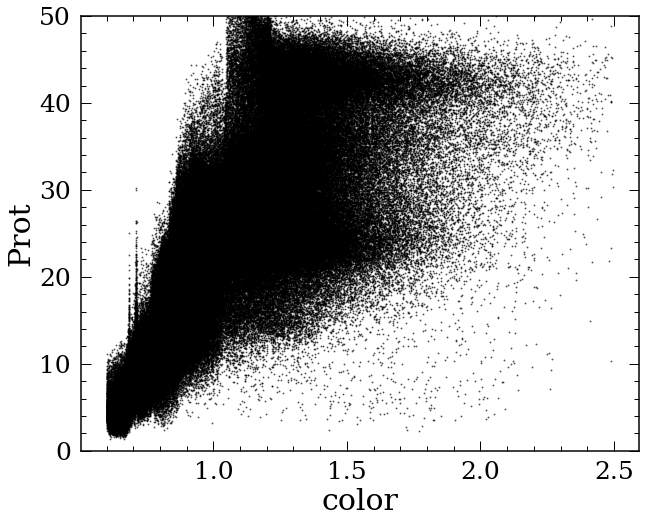

In [186]:
plt.figure(figsize=(10,8))
plt.scatter(galah_feat['bp_rp'],galah_feat['Prot_predict'],s=1,alpha=0.5,c='k')
plt.xlabel('color')
plt.ylabel('Prot')
#plt.xlim([3000,7000])
plt.ylim([0,50])
#plt.gca().invert_xaxis()



In [187]:
galah_age=readfits('Data/GALAH_DR3_VAC_ages_v1.fits')

In [188]:
galah_all=pd.merge(galah_age[['sobject_id','age_bstep','e_age_bstep']],galah_feat,
                   left_on='sobject_id',right_on='sobject_id',how='inner')


In [189]:
solarstars=galah_all.loc[abs(galah_all['fe_h'])<0.05].reset_index(drop=True)

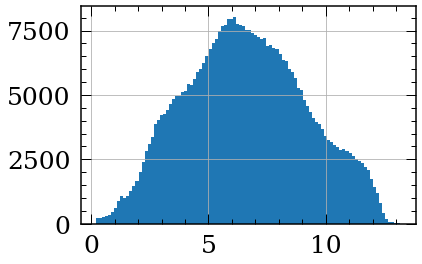

In [190]:
galah_all=galah_all.loc[galah_all['age_bstep']>0.2].reset_index(drop=True)
galah_all['age_bstep'].hist(bins=100)

In [191]:
galah_all=galah_all.loc[galah_all['e_age_bstep']<3].reset_index(drop=True)
np.shape(galah_all)

(286946, 274)

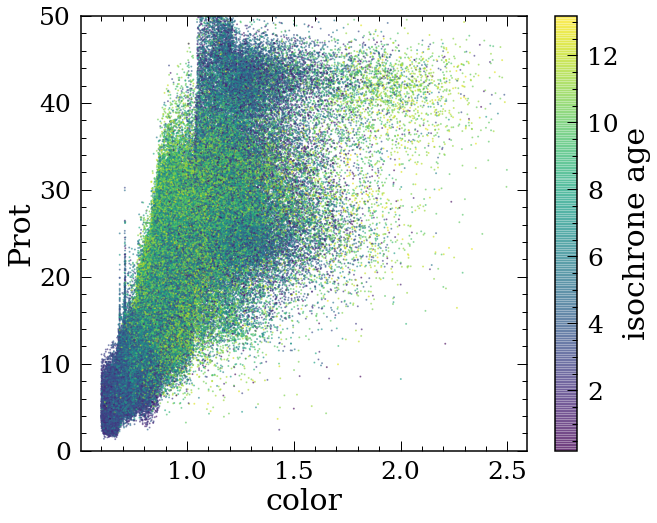

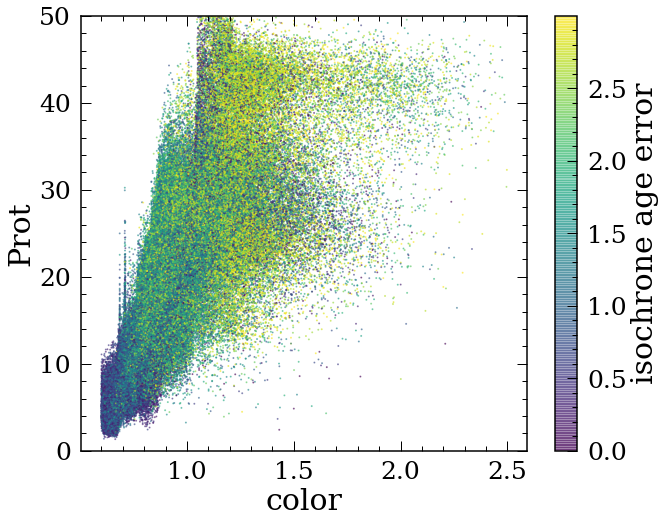

In [192]:
plt.figure(figsize=(10,8))
plt.scatter(galah_all['bp_rp'],galah_all['Prot_predict'],s=1,alpha=0.5,c=galah_all['age_bstep'])
plt.xlabel('color')
plt.ylabel('Prot')
#plt.xlim([3000,7000])
plt.ylim([0,50])
cb=plt.colorbar()
cb.set_label('isochrone age')

plt.figure(figsize=(10,8))
plt.scatter(galah_all['bp_rp'],galah_all['Prot_predict'],s=1,alpha=0.5,c=galah_all['e_age_bstep'])
plt.xlabel('color')
plt.ylabel('Prot')
#plt.xlim([3000,7000])
plt.ylim([0,50])
cb=plt.colorbar()
cb.set_label('isochrone age error')

Text(0, 0.5, '[Mg/Fe]')

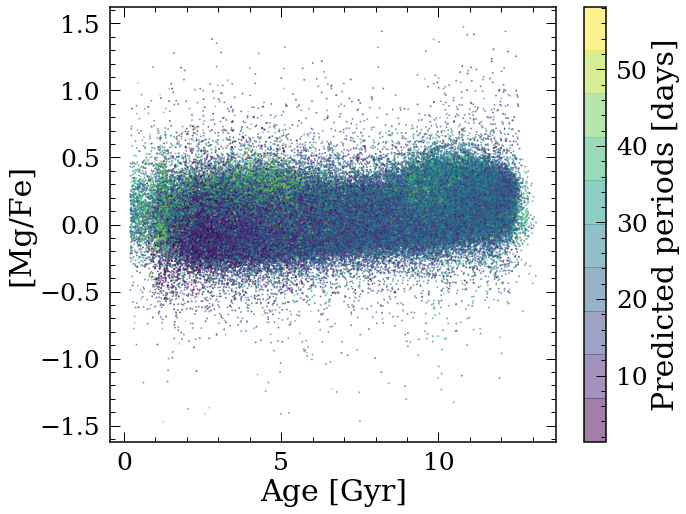

In [193]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',10)
plt.scatter(galah_all['age_bstep'],galah_all['Mg_fe'],s=1,c=galah_all['Prot_predict'],cmap=cm,alpha=0.5)
cb=plt.colorbar()
cb.set_label('Predicted periods [days]')
plt.xlabel('Age [Gyr]')
plt.ylabel('[Mg/Fe]')

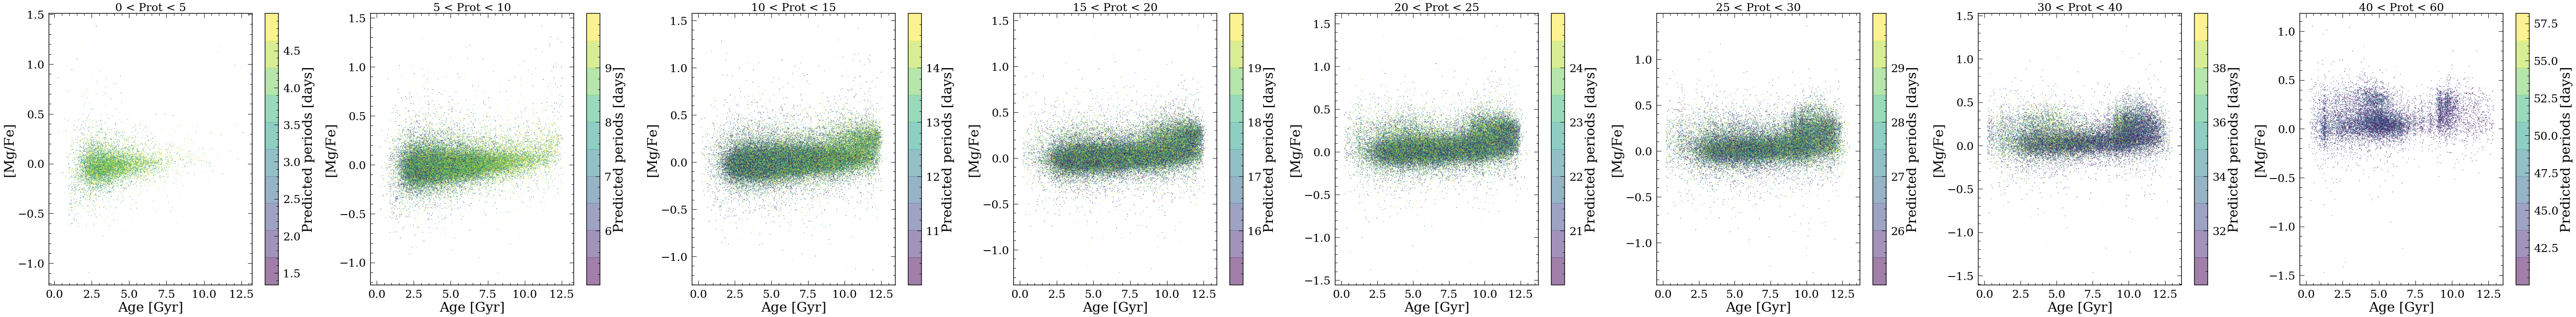

In [194]:
protselect=[0,5,10,15,20,25,30,40,60]
cm = plt.cm.get_cmap('viridis',10)

plt.figure(figsize=(10*(len(protselect)),10))
for i in range(1,len(protselect)):
    plt.subplot(1,len(protselect),i)
    m=(galah_all['Prot_predict']>protselect[i-1]) & (galah_all['Prot_predict']<protselect[i])

    plt.scatter(galah_all['age_bstep'][m],galah_all['Mg_fe'][m],
                s=1,c=galah_all['Prot_predict'][m],cmap=cm,alpha=0.5)
    cb=plt.colorbar()
    cb.set_label('Predicted periods [days]')
    plt.xlabel('Age [Gyr]')
    plt.ylabel('[Mg/Fe]')
    plt.title('%d < Prot < %d'%(protselect[i-1],protselect[i]),fontsize=25)
plt.tight_layout()
plt.savefig('prot.png')

(0, 50)

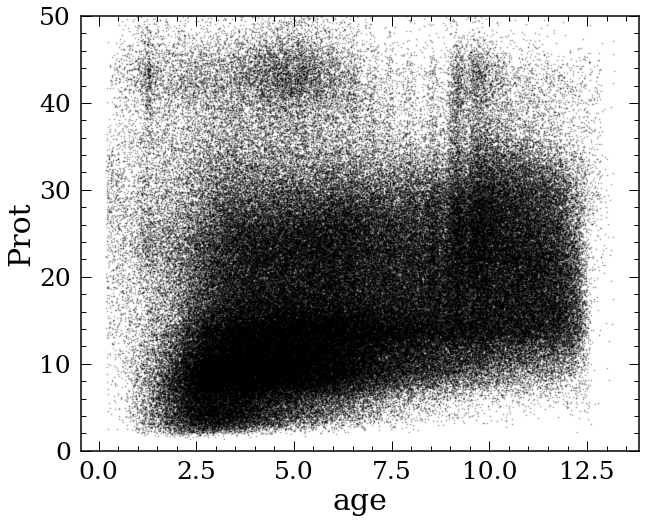

In [195]:
plt.figure(figsize=(10,8))
plt.scatter(galah_all['age_bstep'],galah_all['Prot_predict'],s=1,alpha=0.2,c='k')
plt.xlabel('age')
plt.ylabel('Prot')
#plt.xlim([3000,7000])
plt.ylim([0,50])


# calcualte intrinsic dispersion vs prot

In [196]:
def calc_disp(df,name):
    df_dropna=df.dropna(subset=['age_bstep',name,'e_age_bstep','e_'+name])
    
    p=fitpoints(df_dropna['age_bstep'].values,df_dropna[name].values)
    
    totdisp=np.mean((df_dropna[name]-p(df_dropna['age_bstep']))**2.)
    meadisp=calc_measure_disp(df,name,p)
    intdisp=np.sqrt(totdisp-meadisp)
    return np.sqrt(totdisp),intdisp


def calc_measure_disp(df,name,p):
    trytime=50
    agedisp=[]
    
    x,xerr=df['age_bstep'].values,df['e_age_bstep'].values
    y,yerr=df[name].values,df['e_'+name].values
    
    for i in trange(trytime):
        df['newage']=np.array([np.random.normal(x[k], xerr[k],1)[0] for k in range(len(x))])
        df['newabun']=np.array([np.random.normal(y[k], yerr[k],1)[0] for k in range(len(y))])
        df['newmed']=p(df['newage'])
            
        agedisp.append(np.mean((df['newabun']-df['newmed'])**2.))
            
            
    return np.std(np.array(agedisp))**2.

In [197]:
protselect=[0,5,10,15,20,25]
disps=np.zeros(len(protselect))
totdisp=np.zeros(len(protselect))
nostar=np.zeros(len(protselect))

plt.figure(figsize=(10*(len(protselect)),10))
for i in trange(len(protselect)-1):
    m=(galah_all['Prot_predict']>protselect[i]) & (galah_all['Prot_predict']<protselect[i+1])
    df=galah_all[m].reset_index(drop=True)
    #print(len(df))
    totdisp[i],disps[i]=calc_disp(df,'Mg_fe')
    nostar[i]=sum(m)
    

 18%|█▊        | 9/50 [00:04<00:21,  1.92it/s]


100%|██████████| 5/5 [01:59<00:00, 23.94s/it]


<Figure size 4320x720 with 0 Axes>

Text(0, 0.5, '$σ_{int}$')

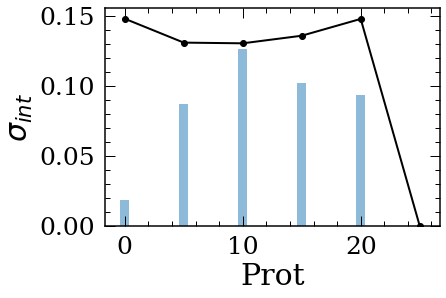

In [198]:
plt.figure()
plt.plot(protselect,disps,'k-o',label='dispersion')
plt.bar(protselect,nostar/5e5,alpha=0.5,label='number of stars')
plt.xlabel('Prot')
plt.ylabel('$σ_{int}$')
